In [3]:
import pandas as pd
import matplotlib as plt
%matplotlib inline 

import string
from collections import namedtuple

import nltk
from nltk.util import ngrams


In [4]:
df = pd.read_pickle('cleaned_content.pickle')

In [5]:
df.columns

Index([u'name', u'filename', u'true_url', u'category', u'title', u'datetime', u'author', u'clean_content', u'image_url'], dtype='object')

In [6]:
df['datetime'][:5]

0   2013-10-31 17:52:00
1   2013-11-05 11:37:00
2   2013-11-05 11:47:00
3   2013-11-05 12:02:00
4   2013-11-05 12:19:00
Name: datetime, dtype: datetime64[ns]

In [7]:
df['datetime'] = pd.to_datetime(df.datetime)

In [8]:
df['datetime'].dt.dayofyear[0]

304.0

In [9]:
df['dayofyear'] = df.datetime.dt.dayofyear.map(str)

In [10]:
df['year'] = df.datetime.dt.year.map(str)

In [11]:
df.dayofyear[:5]

0    304.0
1    309.0
2    309.0
3    309.0
4    309.0
Name: dayofyear, dtype: object

In [12]:
df['year_day'] = df.year + ' - '+ df.dayofyear

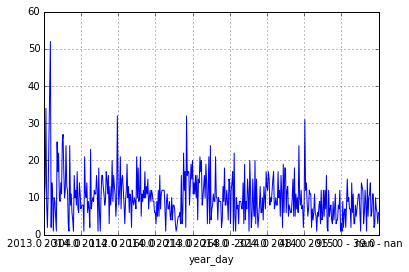

In [13]:
df.groupby(['year_day']).size().plot()

In [14]:
df.author.describe()

count               3521
unique               439
top       Abednego Davis
freq                 234
Name: author, dtype: object

In [15]:
features = ['datetime', 'category', 'title', 'author', 'clean_content' ]
text_features = ['category', 'title', 'author', 'clean_content' ]

analysis = df[features]


In [16]:

sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

In [17]:
uni = lambda x: unicode(x)

for col in text_features:
    df[col] = df[col].apply(uni)

In [18]:
def first(x):
    x = x.strip()
    x = sent_detector.tokenize(x)
    return ' '.join(x[:4])



df['lead'] = df.clean_content.apply(first)


In [19]:
def ebola(x):
    """Returns 1 if ebola in tokenized words"""
    x = x.strip()
    x = x.strip(string.punctuation)
    x = x.lower()
    tokens = nltk.word_tokenize(x)
    if 'ebola' in tokens or 'ebv' in tokens:
        return 1
    else:
        return 0   

df['ebola_title'] = df.title.apply(ebola)
df['ebola_lead'] = df.lead.apply(ebola)
df['ebola_content'] = df.clean_content.apply(ebola)
df['title_len'] = df.title.apply(lambda x: len(x))
df['content_len'] = df.clean_content.apply(lambda x: len(x))
df['lead_len'] = df.lead.apply(lambda x: len(x))

In [20]:
df.columns

Index([u'name', u'filename', u'true_url', u'category', u'title', u'datetime', u'author', u'clean_content', u'image_url', u'dayofyear', u'year', u'year_day', u'lead', u'ebola_title', u'ebola_lead', u'ebola_content', u'title_len', u'content_len', u'lead_len'], dtype='object')

In [21]:
features  = [u'name', r'author', u'year_day', u'ebola_title', u'ebola_lead', u'ebola_content']

In [22]:
df_ebola = df[features]

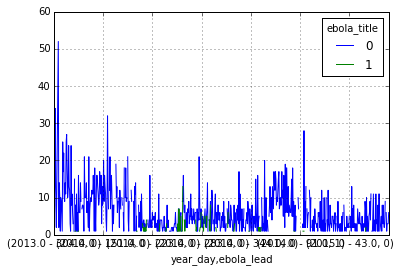

In [23]:
df_ebola.groupby(['year_day', 'ebola_title', 'ebola_lead']).size().fillna(0).unstack('ebola_title').plot()

In [24]:
df_ebola[df_ebola.ebola_title == 1].sort('year_day')

,name,author,year_day,ebola_title,ebola_lead,ebola_content
1295,dailyobserver,William Q. Harmon,2014.0 - 100.0,1,1,1
1296,dailyobserver,"David K. Nyuma, Sr.",2014.0 - 103.0,1,1,1
1299,dailyobserver,None,2014.0 - 104.0,1,0,0
1393,dailyobserver,"Leroy M. Sonpon, III",2014.0 - 106.0,1,1,1
1328,dailyobserver,"Alaskai Moore Johnson, Observer Health Corresp...",2014.0 - 107.0,1,0,1
1338,dailyobserver,Joaquin Sendolo,2014.0 - 108.0,1,1,1
1395,dailyobserver,Joaquin Sendolo,2014.0 - 111.0,1,1,1
1342,dailyobserver,Ibrahim Al-bakri Nyei,2014.0 - 111.0,1,1,1
1380,dailyobserver,A. Leslie Lumeh E-mail:,2014.0 - 115.0,1,0,0
1405,dailyobserver,None,2014.0 - 118.0,1,1,1


In [28]:
df.irow(1295).clean_content

u'President Ellen Johnson Sirleaf has paid homage to Liberians, who have lost their lives as a result of the deadly Ebola virus disease that was confirmed in the country recently.\n President Sirleaf spoke during a visit to the Ministry of Health and Social Welfare Wednesday, April 9, to appreciate the leadership of the Ministry, international partners, and health workers who are fighting to contain the spread of the deadly Ebola virus that recently spilled over to Liberia.\n She expressed condolences to the bereaved families and those affected by the Ebola virus and at the same time expressed appreciation to all who have worked and continue to address this serious health problem.\n \u201cOn behalf of the Liberian people, we want to say to the task force, thank you so much, for all that you have done,\u201d she said, urging all Liberians including foreigners within our borders to work together to contain the situation.\n President Sirleaf stressed that since the virus was announced in 

In [29]:
df.columns

Index([u'name', u'filename', u'true_url', u'category', u'title', u'datetime', u'author', u'clean_content', u'image_url', u'dayofyear', u'year', u'year_day', u'lead', u'ebola_title', u'ebola_lead', u'ebola_content', u'title_len', u'content_len', u'lead_len'], dtype='object')

In [51]:
# df.to_csv('sep='|')
cols = ['name', 'category', 'title', 'datetime', 'author', 'clean_content', u'ebola_title', u'ebola_lead', u'ebola_content']

In [52]:
basic_df = df[cols]

In [53]:
basic_df.to_csv('daily_observer_ebola_tagged.csv', sep='|', encoding='utf-8')

In [54]:
basic_df

,name,category,title,datetime,author,clean_content,ebola_title,ebola_lead,ebola_content
0,dailyobserver,environment,More than just WASH,2013-10-31 17:52:00,Magdalene Matthews,"First of all, let me start by wishing Mr. Kenn...",0,0,0
1,dailyobserver,development-agriculture,"ArcelorMittal, RICCE Conservation Agriculture ...",2013-11-05 11:37:00,Ishmael F. Menkor,\n The newly-introduced farming method known a...,0,0,0
2,dailyobserver,politics,UK Prime Minister Says Open Government Leads t...,2013-11-05 11:47:00,None,British Prime Minister David Cameron wants cou...,0,0,0
3,dailyobserver,development,"24-hrs to Vacate, or Else…",2013-11-05 12:02:00,Edwin M. Fayia III,"\n The General Services Agency (GSA), Tuesday,...",0,0,0
4,dailyobserver,development-agriculture-environment,Head of EU Delegation Presents Resource Materi...,2013-11-05 12:19:00,Joaquin Sendolo,The Head of Liberia’s European Union Delegatio...,0,0,0
5,dailyobserver,politics,George Weah Begins Early Campaign?,2013-11-05 12:54:00,None,Ahead of the official pronouncement of campaig...,0,0,0
6,dailyobserver,development-health,Bong County Health Delivery System in a Mess,2013-11-05 13:06:00,William Q. Harmon,\n The health services delivery system of Bong...,0,0,0
7,dailyobserver,politics,Referendum on Tenures Suggested,2013-11-05 13:16:00,J. Burgess Carter,\n The former chairman of the Liberty Party is...,0,0,0
8,dailyobserver,editorials,Uprooting the Threat of Terrorism,2013-11-05 13:22:00,None,We are very much pleased to see that the Gover...,0,0,0
9,dailyobserver,education,AMEU Adopts 4-Yr Academic Strategy,2013-11-05 16:15:00,None,As parts of activities to enhance smooth and a...,0,0,0
